<a href="https://www.kaggle.com/code/abhilashdas/youtube-stats?scriptVersionId=175490570" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [19]:
# %%timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
import plotly.express as px
pd.set_option('display.max_columns', 57)

warnings.filterwarnings("ignore")

# I asked chatgpt for possible questions that we can ask by feeding it the dataframe columns

Exploratory Data Analysis (EDA) involves investigating and summarizing the main characteristics of a dataset. Based on the columns you've provided, here are some questions you can ask to perform EDA on this database:

1. **General Overview:**
   - How many rows and columns are there in the dataset?
   - What are the data types of each column?
   - Are there any missing values in the dataset?

2. **Youtubers:**
   - Who are the top Youtubers by subscribers and video views?
   - What is the distribution of subscribers and video views among Youtubers?
   - What is the average, minimum, and maximum number of subscribers and video views?

3. **Category:**
   - What are the different categories of videos/channels?
   - How many Youtubers belong to each category?
   - What is the distribution of video views among different categories?

4. **Channel Characteristics:**
   - What are the different channel types present in the dataset?
   - How do the channel types correlate with subscribers and video views?
   - Are there any notable patterns or trends within different channel types?

5. **Earnings:**
   - What is the distribution of earnings (monthly and yearly)?
   - Are there any relationships between earnings and other factors like subscribers, video views, or channel type?
   - Which Youtubers have the lowest and highest earnings?

6. **Time-related Analysis:**
   - How many Youtubers were created each year and each month?
   - Is there any trend or pattern in terms of Youtuber creation over the years?
   - Are there any particular months when new Youtubers are more likely to be created?

7. **Education, Population, and Employment:**
   - How does the gross tertiary education enrollment percentage vary across different Youtubers?
   - Is there any correlation between education enrollment and other factors like subscribers or video views?
   - How does unemployment rate relate to different Youtubers?
   - Is there a relationship between urban population and Youtuber characteristics?

8. **Rankings and Views:**
   - What is the distribution of video views ranks and country ranks?
   - Is there any correlation between these ranks and other attributes?
   - How do the ranks vary across different categories or channel types?

Remember that these questions are just a starting point for your EDA. The specific analysis you perform will depend on the goals of your investigation and the insights you're seeking to extract from the data.

In [20]:
fpath = '/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv'
df = pd.read_csv(fpath, encoding= 'latin-1', index_col='rank')
df.head(3)

,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
rank,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [21]:
df.isnull().sum()

Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date                                 5
Gross tertiar

No values in 'rank' column is missing, so we can use it for indexing

Positive correlation between **subscribers** and **video views** and **highest_monthly_earnings**

##### Top 10 rank wise

In [22]:
top_10 = df[0:10]
top_10

,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
rank,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.000000e+00,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,5.0,3.0,3.0,7.316740e+08,182900.0,2900000.00,2200000.00,3.510000e+07,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,44.0,1.0,4.0,3.918400e+07,9800.0,156700.00,117600.00,1.900000e+06,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,630.0,5.0,25.0,4.894700e+07,12200.0,195800.00,146800.00,2.300000e+06,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756


In [23]:
pd.DataFrame(top_10.groupby('category').count()['Youtuber'])

,Youtuber
category,
Education,1
Entertainment,2
Film & Animation,1
Gaming,1
Music,1
People & Blogs,2
Shows,1


In [24]:
pd.DataFrame(top_10.groupby('category')['Youtuber'])

,0,1
0,Education,rank 4 Cocomelon - Nursery Rhymes Name: You...
1,Entertainment,rank 3 MrBeast 10 Vlad and Niki N...
2,Film & Animation,"rank 2 YouTube Movies Name: Youtuber, dtype..."
3,Gaming,"rank 8 PewDiePie Name: Youtuber, dtype: object"
4,Music,"rank 1 T-Series Name: Youtuber, dtype: object"
5,People & Blogs,rank 7 ýýý Kids Diana Show 9 Lik...
6,Shows,"rank 5 SET India Name: Youtuber, dtype: object"


In [25]:
top_10 = df[0:10]
fig3 = px.bar(data_frame=top_10, x='subscribers', y=top_10.index,hover_name='Youtuber', orientation='h'
      , color='subscribers',text='subscribers')
fig3.update_traces(opacity=0.6)

In [26]:
fig3 = px.bar(data_frame=top_10, x=top_10.index, y='category', hover_name='Youtuber', orientation='v'
      , color='category',text='category')
fig3.update_traces(opacity=0.6)

In [27]:
fig3 = px.bar(data_frame=top_10, x='created_year', y='Youtuber', hover_name='Youtuber', orientation='v'
      , color='category',text='Youtuber')
fig3.update_traces(opacity=0.6)

In [28]:
fig3 = px.bar(data_frame=top_10, x='video views', y='Gross tertiary education enrollment (%)', hover_name='Youtuber', orientation='v'
      , color='category',text='Youtuber')
fig3.update_traces(opacity=0.6)

Text(0.5, 0, 'Subscribers')

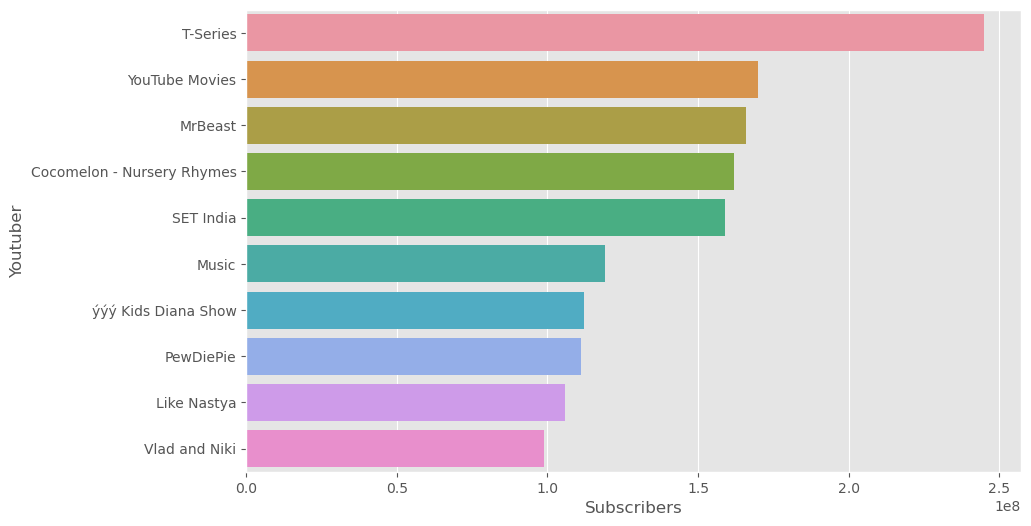

In [29]:

# Rank 6 channel 'Music' us missing Category, we know its category is 'Music', same as T-Series
top_10.at[6, 'category'] = 'Music'

plt.figure(figsize=(10,6))
sns.barplot(data=top_10, x='subscribers', y='Youtuber',orient='h')
plt.xlabel('Subscribers')
# T-Series has a huge leap over the 2nd position

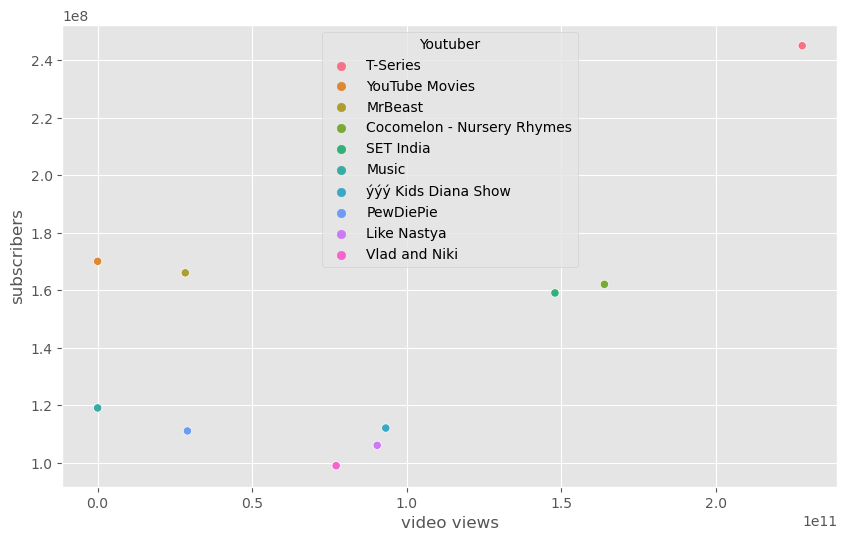

In [30]:
color = sns.color_palette("Spectral", as_cmap=True)
# sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

sns.scatterplot(data=top_10, x='video views', y='subscribers', hue='Youtuber')
plt.show()

1. T-Series has high subscribers and high video views
2. Youtube Movies has high subs but low views
3. Vlad and Niki, Like Nastya and Kids Diana Show have low subs but good video views
4. Subscriber count is directly proportional to video views, Youtube Movies is an outlier

In [31]:
import plotly.express as px
fig = px.scatter(top_10, x='subscribers', y='highest_yearly_earnings', size='video views', hover_name='Youtuber', color='uploads')
fig.show()

##### Top 25

In [32]:
df25 = df[0:25]
goodCols = df25.isnull().sum() == 0

needed = goodCols * df25.columns

need = []
for i in needed:
    if len(i) > 0:
        need.append(i)
        
df25 = df25[need]

<Axes: >

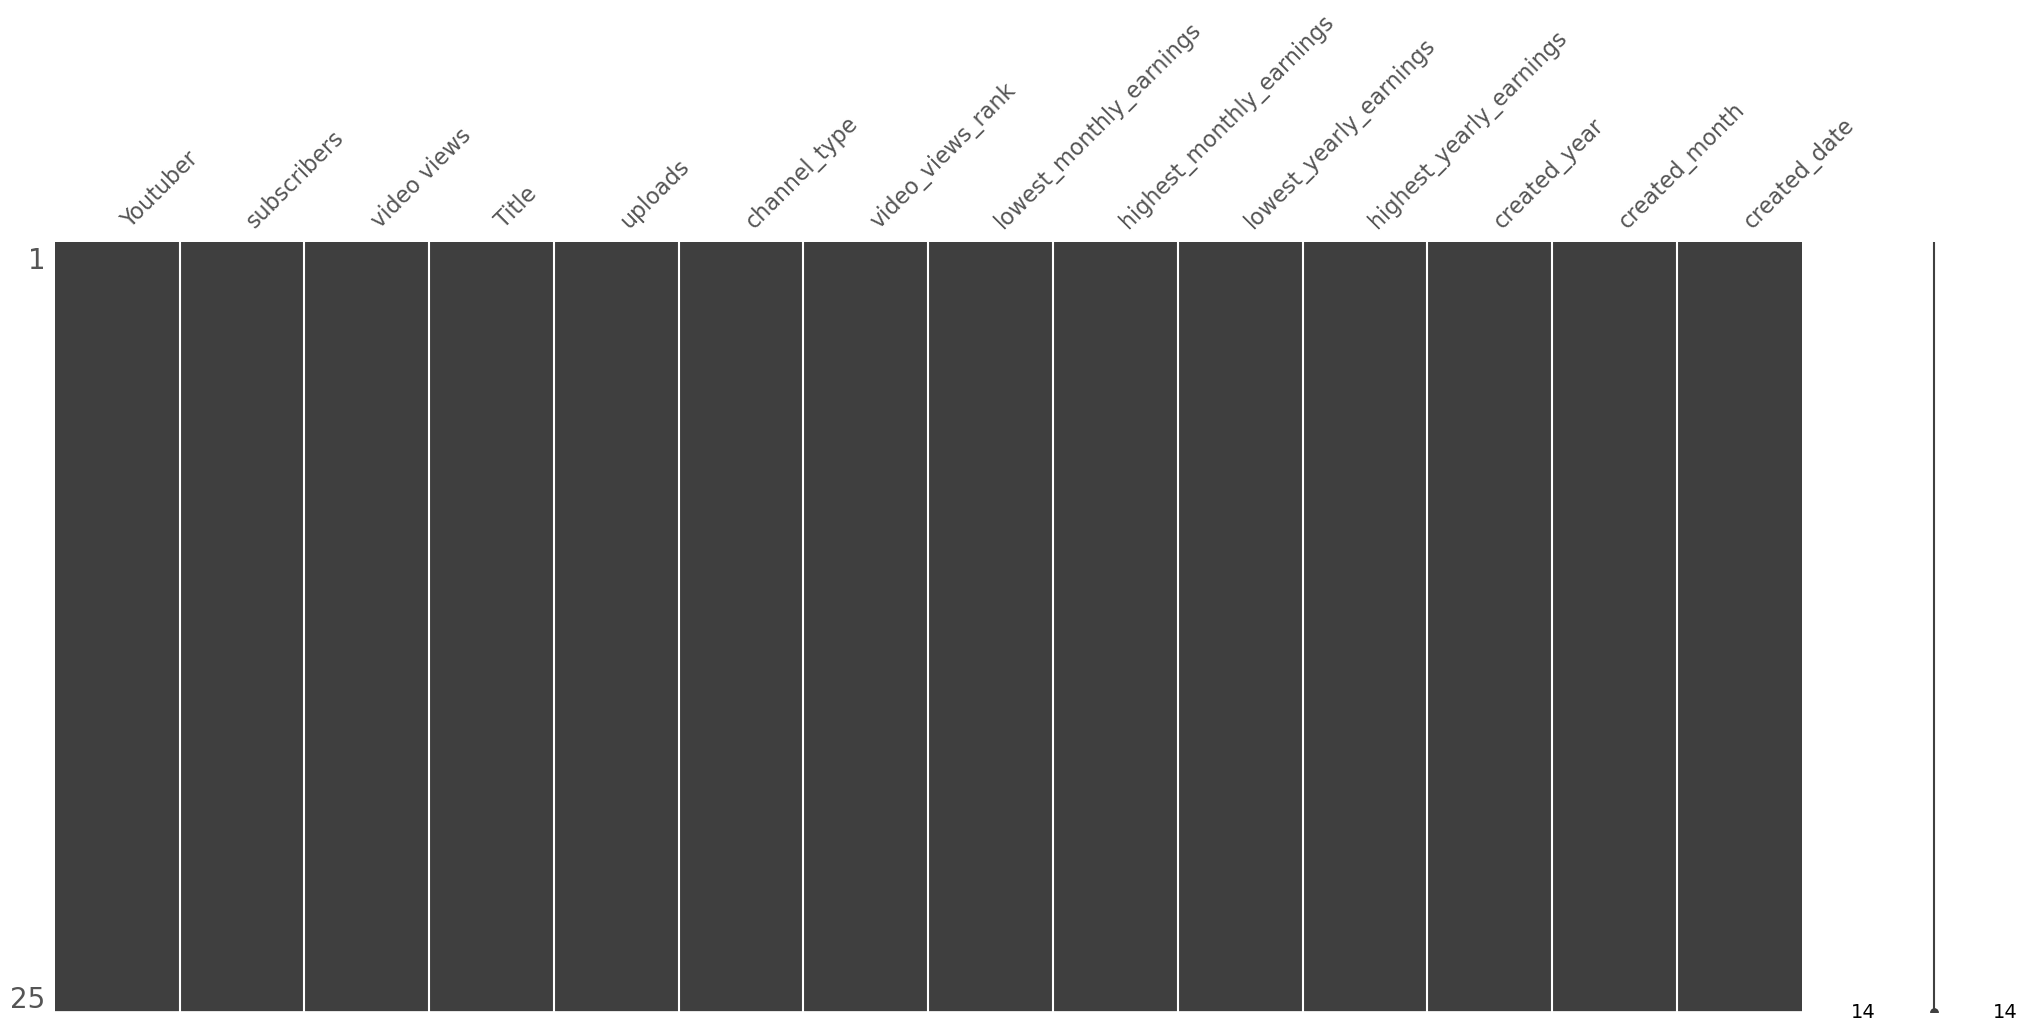

In [33]:
msno.matrix(df25)

In [34]:
df25.info()
print("******************************")
numeric_clmns = df25.dtypes[df25.dtypes != "object"].index
print("Numeric Columns are: ", numeric_clmns)
print("******************************")
object_clmns = df25.dtypes[df25.dtypes == "object"].index
print("Object Columns are: ", object_clmns)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 25
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Youtuber                  25 non-null     object 
 1   subscribers               25 non-null     int64  
 2   video views               25 non-null     float64
 3   Title                     25 non-null     object 
 4   uploads                   25 non-null     int64  
 5   channel_type              25 non-null     object 
 6   video_views_rank          25 non-null     float64
 7   lowest_monthly_earnings   25 non-null     float64
 8   highest_monthly_earnings  25 non-null     float64
 9   lowest_yearly_earnings    25 non-null     float64
 10  highest_yearly_earnings   25 non-null     float64
 11  created_year              25 non-null     float64
 12  created_month             25 non-null     object 
 13  created_date              25 non-null     float64
dtypes: float64(8

In [35]:
import plotly.express as px
fig = px.scatter_3d(df25, x='subscribers', y=df25.index, z='video_views_rank',
              color='created_date', size='created_date', size_max=40, opacity=0.7,
              hover_name='Youtuber', symbol='channel_type')
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
# fig.update_layout(coloraxis_colorbar=dict(orientation="h"))
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0,
                                          ticks="outside",
                                          ticksuffix=" bills"))

fig.show()

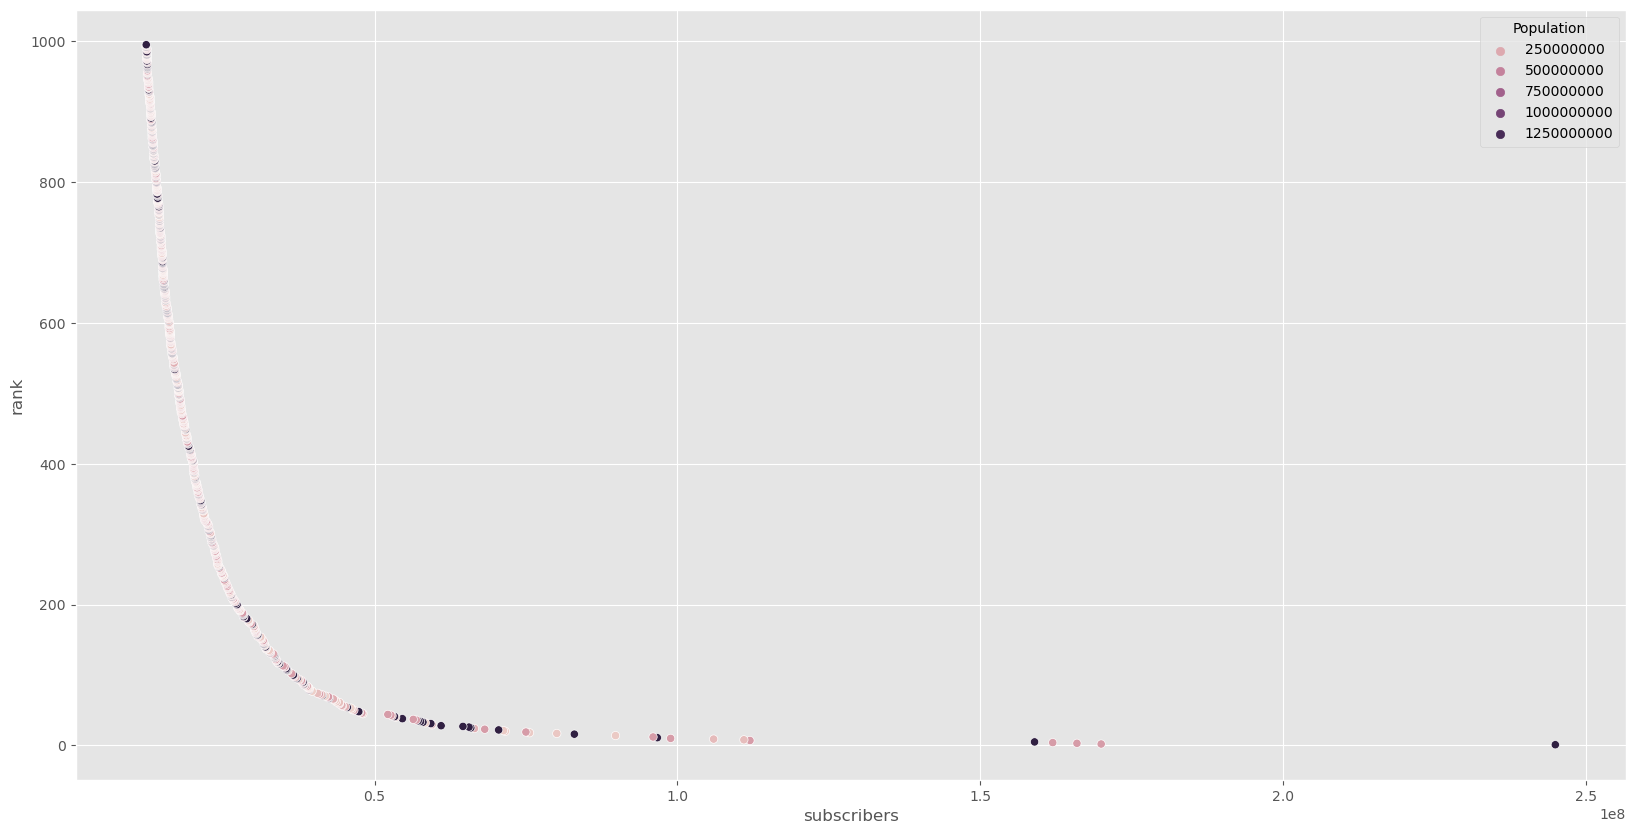

In [36]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, y=df.index, x='subscribers', hue='Population')
plt.show()

Huge difference of Subscribers in between ranks